In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [18]:
path="resources/Indeed_Jobs_with_major_2020.csv"

df=pd.read_csv(path)

<AxesSubplot:xlabel='category'>

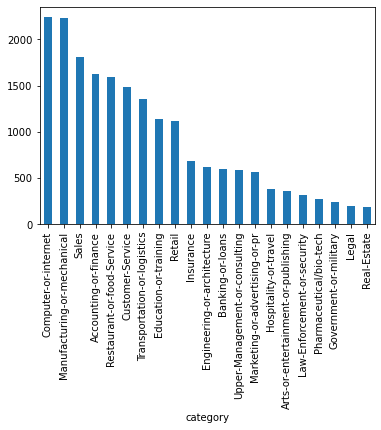

In [21]:
category=df.groupby('category')['job_title'].count().sort_values(ascending=False)
category.plot(kind='bar')

Field of study
Business                                                   8359
Computer and information sciences                          2242
Engineering                                                2231
Communication journalism and related programs              1487
Transportation and materials moving                        1350
Education                                                  1144
Architecture and related services                           621
Multi/interdisciplinary studies                             589
English language and literature/letters                     355
Homeland security law enforcement and\n   firefighting      312
Biological and biomedical sciences                          272
Homeland security law enforcement and\n   firefighting      239
Legal professions and studies                               200
Family and consumer sciences/human sciences                 186
Name: job_title, dtype: int64

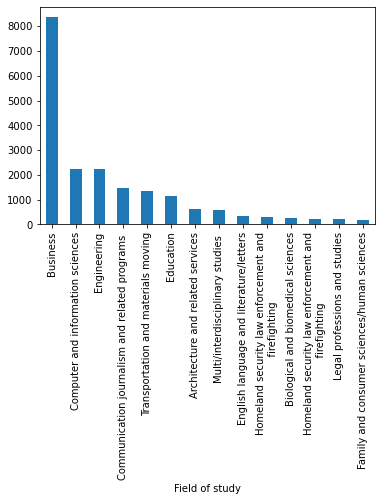

In [33]:

major=df.groupby('Field of study')['job_title'].count().sort_values(ascending=False)

major.plot(kind='bar')
major=major.reindex()
major

In [36]:
sum_df=pd.read_csv("resources/college_sum.csv")
sum_df


,Unnamed: 0,Field of study,sum
0,0,Agriculture and natural resources,615354
1,1,Architecture and related services,272090
2,2,Area ethnic cultural gender and group studies,152036
3,3,Biological and biomedical sciences,1769003
4,4,Business,8005249
5,5,Communication journalism and related programs,1348640
6,6,Communications technologies,67043
7,7,Computer and information sciences,410081
8,8,Computer and information sciences,806938
9,9,Education,4542301


In [42]:
plot_df=pd.merge(major,sum_df,on="Field of study")
plot_df

,Field of study,job_title,Unnamed: 0,sum
0,Business,8359,4,8005249
1,Computer and information sciences,2242,7,410081
2,Engineering,2231,10,2213784
3,Communication journalism and related programs,1487,5,1348640
4,Transportation and materials moving,1350,34,80159
5,Education,1144,9,4542301
6,Architecture and related services,621,1,272090
7,Multi/interdisciplinary studies,589,24,735794
8,English language and literature/letters,355,12,1023687
9,Homeland security law enforcement and\n fire...,312,16,1870


In [43]:
plot_df.sort_values(by="job_title",ascending=False)

,Field of study,job_title,Unnamed: 0,sum
0,Business,8359,4,8005249
1,Computer and information sciences,2242,7,410081
2,Engineering,2231,10,2213784
3,Communication journalism and related programs,1487,5,1348640
4,Transportation and materials moving,1350,34,80159
5,Education,1144,9,4542301
6,Architecture and related services,621,1,272090
7,Multi/interdisciplinary studies,589,24,735794
8,English language and literature/letters,355,12,1023687
9,Homeland security law enforcement and\n fire...,312,16,1870


In [70]:
p1="resources/Bachelors_degree_CSV.csv"
p2="resources/Masters_degree_CSV.csv"
p3="resources/Doctrate_degree_CSV.csv"

df1=pd.read_csv(p1)
df2=pd.read_csv(p2)
df3=pd.read_csv(p3)

df3.drop([1,2,34,35,36,37,38],0,inplace=True);
df2.drop([1,2,36,37,38,39,40],0,inplace=True);
df1.drop([1,2,36,37,38,39,40],0,inplace=True);

df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df2=df2.rename(columns=df2.iloc[0]).drop(df2.index[0])
df3=df3.rename(columns=df3.iloc[0]).drop(df3.index[0])

df1=df1.fillna(0)
df2=df2.fillna(0)
df3=df3.fillna(0)

df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df3 = df3.replace(',','', regex=True)

def change_dtype(value):
      try:
          return int(value)
      except ValueError:
          try:
              return float(value)
          except ValueError:
              return value

for column in df1.columns:
      df1.loc[:, column] = df1[column].apply(change_dtype)
for column in df2.columns:
     df2.loc[:, column] = df2[column].apply(change_dtype)
for column in df3.columns:
      df3.loc[:, column] = df3[column].apply(change_dtype)
Mdf=pd.concat([df1, df2,df3]).groupby(['Field of study']).sum().reset_index()
# Mdf = Mdf.set_index('Field of study').T
Mdf=Mdf.set_index('Field of study')

Mdf=Mdf.rename(index={"Business\\2\\":"Business","Agriculture and natural resources\\1\\":"Agriculture and natural resources","Engineering technologies\\3\\":"Engineering technologies"})

Mdf=Mdf.reset_index()

In [59]:
Mdf

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Agriculture and natural resources,16215,23670,26956,21782,17604,27235,28769,28899,32707,35642,38695,41339,43076,44265,45223,46138,47780,49359
1,Architecture and related services,7311,12443,12701,12452,13406,12486,12935,15459,17541,17824,18430,18099,17444,17368,17061,16753,16005,16372
2,Area ethnic cultural gender and group studies,3754,4756,3850,4092,6168,7468,7931,10184,10648,11146,11477,11038,10455,9942,9930,9786,9727,9684
3,Biological and biomedical sciences,44933,63958,52484,46864,48468,72857,72818,85547,104793,109001,116204,121636,126923,132612,137450,141137,144059,147259
4,Business,142660,186669,259217,304299,328605,321543,380297,466150,538116,554597,561379,552332,550535,552093,561850,571849,581769,591289
5,Communication journalism and related programs,12239,23202,32495,45378,56032,52738,63599,81225,89480,92110,93339,94190,97576,100883,102856,104528,103196,103574
6,Communications technologies,564,1410,2074,1793,1614,1341,1607,3511,5248,5361,5484,5564,5571,5689,5319,5154,4760,4979
7,Computer and information sciences,1716,2847,4470,8414,10000,11448,17679,18611,19554,21104,22623,24616,26496,33473,42119,48535,48485,47891
8,Computer and information sciences,2388,5652,15121,42337,25159,24506,44142,47702,39593,43066,47406,50961,55271,59586,64402,71416,79597,88633
9,Education,270014,287700,212066,168573,204348,216566,239571,289441,292689,298777,294821,279922,264422,249949,244851,243446,241747,243398


In [71]:
Mdf=Mdf[["Field of study","2018-19"]]
Mdf['Major_sum']=Mdf.sum(axis=1)
Mdf=Mdf[["Field of study",'Major_sum']]

In [83]:
plot_df=pd.merge(major,Mdf,on="Field of study")
plot_df['Major_sum']=plot_df['Major_sum']/50

<AxesSubplot:xlabel='Field of study'>

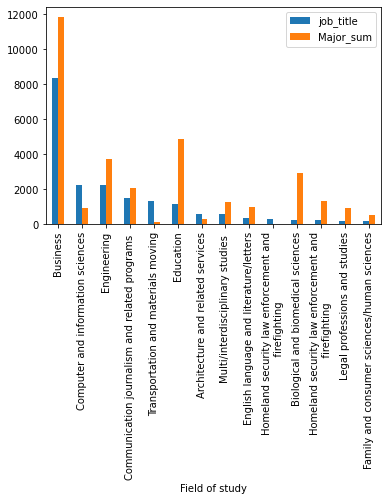

In [84]:
plot_df.plot(kind='bar',x="Field of study")